## EXPLORATORY DATA ANALYSIS – FEATURE ENGINEERING

#Experiment #3: Feature Engineering

This experiment focuses on discussing concepts and implementing code snippets to demonstrate various techniques used for feature engineering. These steps are vital in preparing data for machine learning and analysis. Throughout the experiment, you will also work on exercises to apply your knowledge and develop essential skills. The topics that will be discussed in the experiment are

##3.1 Data Transformation
3.1.1 Scalling \
3.1.2 Discreateization \
3.1.3 Encoding \

##3.2 Handling High-Dimensional Data
3.2.1 Principal Component Analysis \


#3.1 Data Transformation


Data Transformation is a crucial step in the data preprocessing phase of machine learning. It involves a series of operations aimed at preparing raw data into a format that is suitable for training and evaluating machine learning models. Data transformation encompasses several key processes, including scaling, normalization, discretization, and encoding, each serving its purpose in enhancing the quality and usability of the data. Here's a description of these data transformation techniques:

- **Scaling**: This method involves transforming numerical features to a common scale without changing their relative relationships. This is particularly important for algorithms that are sensitive to the magnitude of features. Scaling is applied to ensure that no single feature dominates the learning process due to its larger magnitude. The Min-Max scaling is a commonly used method in which features are scaled to a specific range, often [0, 1]. The standardization is another type of scaling that transforms numerical features to have a a zero mean and unity variance (mean=0, standard deviation=1).

- **Discretization**: This method involves converting continuous numerical data into discrete categories or bins. This is particularly useful when you want to transform numeric data into categorical or ordinal data. Discretization can simplify complex numerical data and make it suitable for algorithms that work with categorical or ordinal features. Some common techniques include equal-width binning (dividing the data into equal-width intervals) and equal-frequency binning (ensuring each bin contains approximately the same number of data points).

- **Encoding**: Encoding is the process of converting categorical data (text or labels) into a numerical format that machine learning models can understand. It allows algorithms to work with non-numeric data Some common encoding methods include **one-hot encoding** (creating binary columns for each category), **label encoding** (assigning a unique integer to each category), and **ordinal encoding** (mapping ordinal categories to numerical values).

## 3.1.1 Scaling

To demonstrate the Scaling method, let us start with synthetic data as presented in the code snippet below.

In [1]:
import numpy as np
import pandas as pd

#To generate an array of floating numbers between -2 and 2
A = np.random.random(1000)*4 - 2

#To generate an array of floating numbers between -10 and 10
B = np.random.random(1000)*20 - 10

#To generate an array of floating numbers between 0 and 1
C = np.random.random(1000)

#To generate an array of floating numbers between 0 and 10
D = np.random.random(1000)*10

df = pd.DataFrame({'A':A,'B':B,'C':C,'D':D})
df.head()

,A,B,C,D
0,0.253868,0.051780,0.388819,9.948553
1,-0.907343,-0.260471,0.355950,6.041168
2,0.053636,-7.346882,0.400370,9.449086
3,0.895472,-0.364262,0.407364,4.204453
4,1.907485,8.700289,0.832911,8.293361


Let's also display some statistics about this synthetic data.

In [2]:
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.026706,-0.086304,0.522148,5.108809
std,1.155626,5.647568,0.283657,2.854436
min,-1.994479,-9.992775,0.000054,0.005002
25%,-1.038820,-5.067128,0.281555,2.652822
50%,-0.064106,0.044093,0.530255,5.168463
75%,1.005533,4.721310,0.772449,7.610342
max,1.996704,9.977793,0.999952,9.993714


As can be observed, the range of values for each feature is different. To scale the data, we will use the **MinMaxScaler()** from sklearn. This method takes the intended minimum and maximum values of the scaled data as a tuple argument (min, max), which is set to (0, 1) by default.

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
data = scaler.transform(df)
df_scaler = pd.DataFrame(data,columns=list('ABCD'))
df_scaler.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.493030,0.496054,0.522147,0.510958
std,0.289545,0.282795,0.283685,0.285766
min,0.000000,0.000000,0.000000,0.000000
25%,0.239442,0.246645,0.281529,0.265081
50%,0.483659,0.502583,0.530254,0.516930
75%,0.751660,0.736789,0.772473,0.761393
max,1.000000,1.000000,1.000000,1.000000


After scaling, all features are scaled between 0 and 1. Let's plot the distribution of the original and scaled data.

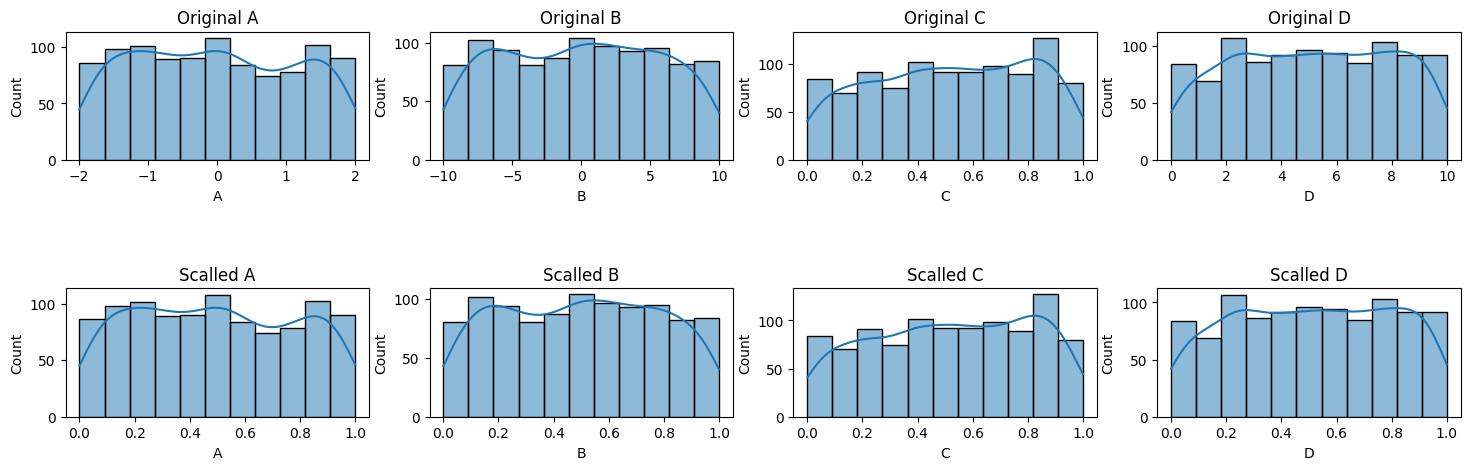

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=4,nrows=2)

sns.histplot(data=df, x="A", ax=axs[0,0], kde=True);axs[0,0].set_title(f"Original A")
sns.histplot(data=df, x="B", ax=axs[0,1], kde=True);axs[0,1].set_title(f"Original B")
sns.histplot(data=df, x="C", ax=axs[0,2], kde=True);axs[0,2].set_title(f"Original C")
sns.histplot(data=df, x="D", ax=axs[0,3], kde=True);axs[0,3].set_title(f"Original D")

sns.histplot(data=df_scaler, x="A", ax=axs[1,0], kde=True);axs[1,0].set_title(f"Scalled A")
sns.histplot(data=df_scaler, x="B", ax=axs[1,1], kde=True);axs[1,1].set_title(f"Scalled B")
sns.histplot(data=df_scaler, x="C", ax=axs[1,2], kde=True);axs[1,2].set_title(f"Scalled C")
sns.histplot(data=df_scaler, x="D", ax=axs[1,3], kde=True);axs[1,3].set_title(f"Scalled D")

fig.subplots_adjust(hspace=1)

The histogram plots illustrate that scaling did not alter the distribution of the features but did affect the range of their values.

To illustrate the significance of feature scaling in many machine learning scenarios, consider the data within the **ENCS5141_Exp3_Mall_Customers.csv** file, available in the GitHub repository at https://github.com/mkjubran/ENCS5141Datasets. This dataset includes the annual income and spending score of numerous mall customers. As before, we will initiate by cloning the GitHub repository. You may skip this step if the repository has already been cloned

In [5]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 57 (delta 13), reused 48 (delta 7), pack-reused 0
Receiving objects: 100% (57/57), 3.66 MiB | 4.64 MiB/s, done.
Resolving deltas: 100% (13/13), done.


To read the file and display information about the features run the following code

In [6]:
import pandas as pd
df = pd.read_csv("/content/ENCS5141Datasets/ENCS5141_Exp3_Mall_Customers.csv", index_col=0)
df.describe()

,Annual Income,Spending Score
count,30.000000,30.000000
mean,21433.333333,50.866667
std,4452.301484,33.053492
min,15000.000000,3.000000
25%,18250.000000,18.500000
50%,20000.000000,53.500000
75%,24750.000000,78.500000
max,29000.000000,99.000000


As can be observed, the Annual Income feature has a range in the thousands, whereas the Spending Score is in tens.

To investigate the impact of the scalling on machine learning, we will compare the performance of the machine learning models with and without feature scalling. In this context, we will use the K-Means classifier to cluster the data into groups. The classifier will be discussed in detail in subsequent experimental sessions.

In [7]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=4)

# Fit the KMeans model to the data, using the 'Annual Income' and 'Spending Score' columns as features
km.fit(df[['Annual Income', 'Spending Score']])

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(df[['Annual Income', 'Spending Score']])

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
df['cluster'] = cluster

# Display the first few rows of the DataFrame with the 'cluster' column added
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Annual Income,Spending Score,cluster
CustomerID,,,
1,15000,30,2
2,15000,81,2
3,16000,6,2
4,16000,77,2
5,17000,33,2


To visualize the resuls, use the **sns.scatterplot()** as below

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

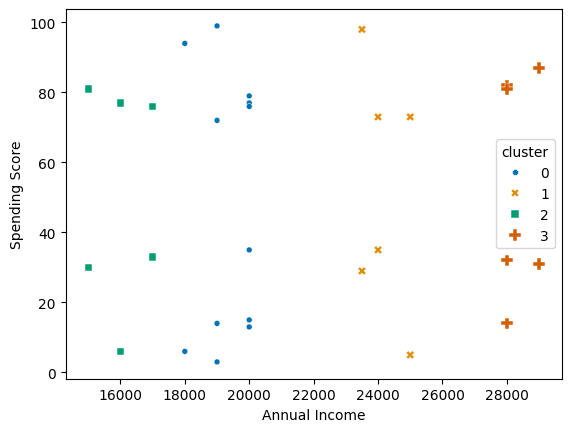

In [8]:
# Import the seaborn library for data visualization
import seaborn as sns

# Create a scatter plot:
# - x-axis: 'Annual Income'
# - y-axis: 'Spending Score'
# - 'hue' parameter assigns different colors to data points based on the 'cluster' column
# - 'style' parameter assigns different markers/styles to data points based on the 'cluster' column
# - 'size' parameter adjusts the size of data points based on the 'cluster' column
# - 'palette' parameter defines the color palette used for the plot
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['cluster'], style=df['cluster'], size=df['cluster'], palette='colorblind')

From the scatter plot, it's evident that the points are grouped or clustered based on the 'Annual Income' (with values in thousands) and do not take into account the 'Spending Score' feature (with values in tens). Is this an acceptable clustering approach?

Let us repeate the classification but after feature scalling.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income', ylabel='Spending Score'>

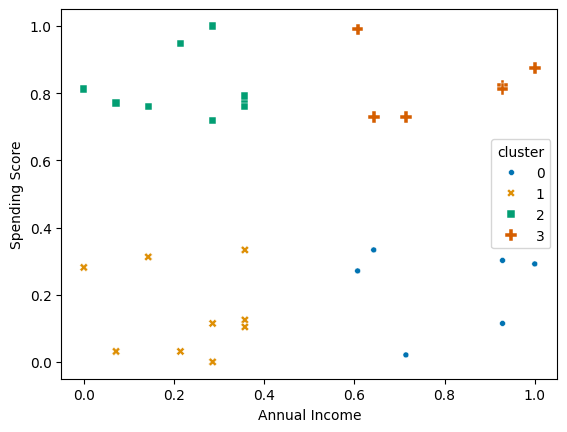

In [9]:
# Import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the DataFrame 'df', which computes the minimum and maximum values for scaling
scaler.fit(df)

# Transform and scale the data in 'df' using the fitted scaler
data = scaler.transform(df)

# Create a new DataFrame 'df_scaler' to store the scaled data, maintaining column names from 'df'
df_scaler = pd.DataFrame(data, columns=df.columns)


# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=4)

# Fit the KMeans model to the data, using the 'Annual Income' and 'Spending Score' columns as features
km.fit(df_scaler[['Annual Income', 'Spending Score']])

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(df_scaler[['Annual Income', 'Spending Score']])

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
df_scaler['cluster'] = cluster

# Create a scatter plot:
# - x-axis: 'Annual Income'
# - y-axis: 'Spending Score'
# - 'hue' parameter assigns different colors to data points based on the 'cluster' column
# - 'style' parameter assigns different markers/styles to data points based on the 'cluster' column
# - 'size' parameter adjusts the size of data points based on the 'cluster' column
# - 'palette' parameter defines the color palette used for the plot
sns.scatterplot(x=df_scaler['Annual Income'], y=df_scaler['Spending Score'], hue=df_scaler['cluster'], style=df_scaler['cluster'], size=df_scaler['cluster'], palette='colorblind')


**Task 3.1**: Referring to the figure shown above, please provide your observations regarding the clustering of Mall Customers' records both before and after the scaling process.


Before scaling, we noticed that the spending score did not contribute in the clustering, but when the data was scaled, we saw the contribution of both of the features.

**Task 3.2**: To demonstrate the impact of scaling on machine learning, your task is to cluster the records in the 'tips' dataset based on the **total_bill** and **tip** features, both before and after applying feature scaling.

**Note**: The tips dataset contains information about tips received by a waiter over a few months in a restaurant. It has details like how much tip was given, the bill amount, whether the person paying the bill is male or female, if there were smokers in the group, the day of the week, the time of day, and the size of the group.

You may load the dataset using the following code snippet.

In [10]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
# write you code here

# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=4)

# Fit the KMeans model to the data, using the 'Annual Income' and 'Spending Score' columns as features
km.fit(tips[['total_bill', 'tip']])

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(tips[['total_bill', 'tip']])

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
tips['cluster'] = cluster

# Display the first few rows of the DataFrame with the 'cluster' column added
tips.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,total_bill,tip,sex,smoker,day,time,size,cluster
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


<Axes: xlabel='total_bill', ylabel='tip'>

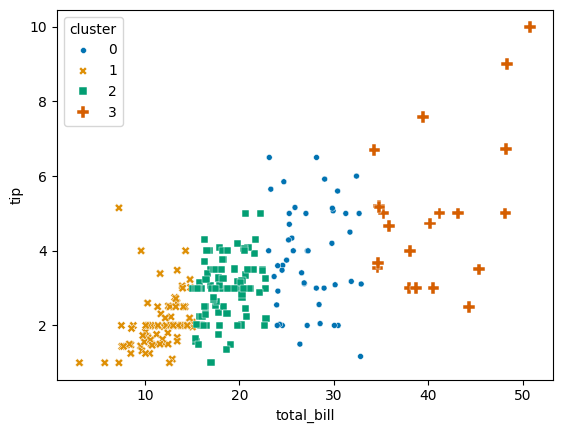

In [12]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips['cluster'], style=tips['cluster'], size=tips['cluster'], palette='colorblind')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='total_bill', ylabel='tip'>

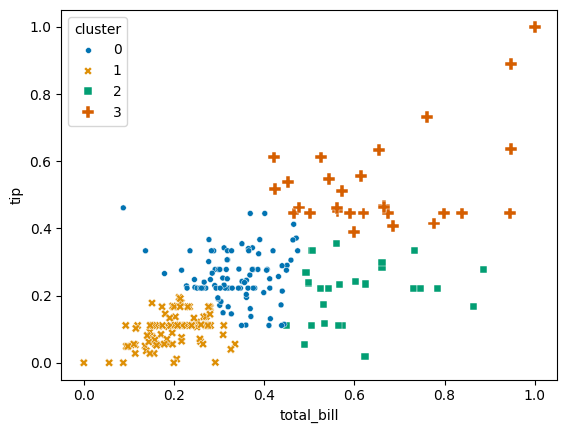

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
tips['sex'] = label_encoder.fit_transform(tips['sex'])
tips['smoker'] = label_encoder.fit_transform(tips['smoker'])
tips['day'] = label_encoder.fit_transform(tips['day'])
tips['time'] = label_encoder.fit_transform(tips['time'])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the DataFrame 'tips', which computes the minimum and maximum values for scaling
scaler.fit(tips)

# Transform and scale the data in 'tips' using the fitted scaler
data = scaler.transform(tips)

# Create a new DataFrame 'tips_scaler' to store the scaled data, maintaining column names from 'tips'
tips_scaler = pd.DataFrame(data, columns=tips.columns)


# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=4)

# Fit the KMeans model to the data, using the 'total_bill' and 'tip' columns as features
km.fit(tips_scaler[['total_bill', 'tip']])

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(tips_scaler[['total_bill', 'tip']])

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
tips_scaler['cluster'] = cluster

# Create a scatter plot:
# - x-axis: 'total_bill'
# - y-axis: 'tip'
# - 'hue' parameter assigns different colors to data points based on the 'cluster' column
# - 'style' parameter assigns different markers/styles to data points based on the 'cluster' column
# - 'size' parameter adjusts the size of data points based on the 'cluster' column
# - 'palette' parameter defines the color palette used for the plot
sns.scatterplot(x=tips_scaler['total_bill'], y=tips_scaler['tip'], hue=tips_scaler['cluster'], style=tips_scaler['cluster'], size=tips_scaler['cluster'], palette='colorblind')

## 3.1.2 Discretization



To demonstrate discretization, we will load the "fetch_california_housing" dataset. This dataset is a popular dataset used in machine learning. It contains data related to housing in California, primarily for the purpose of regression analysis. This dataset is often used for tasks such as predicting the median house value for districts in California based on various features. The dataset includes several features that can be used as input variables for regression models. Some of the typical features include median income, average house occupancy, latitude, longitude, and more. The target variable is the median house value for each district. This is the variable that you typically aim to predict in regression tasks.

In [14]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y= True, as_frame = True)
df = pd.concat((X,y), axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**3.1.2.1 Equal Width Discretiser**

Equal Width Discretiser is a data preprocessing technique used in feature engineering to transform continuous numerical data into discrete categories of equal width. This method divides the range of the data into a specified number of bins or intervals, ensuring that each bin has the same width or range.

In [15]:
# Install the feature_engine library if not already installed
!pip install feature_engine

# Import the required library and module
from feature_engine import discretisation as dsc

# Set up the discretisation transformer with specified parameters:
# - 'bins' sets the number of bins or intervals (8 in this case)
# - 'variables' specifies the columns to be discretized
# - if 'return_boundaries=True' is set, then it indicates that you want to return bin boundaries and not the discreate values
disc = dsc.EqualWidthDiscretiser(bins=8, variables=['MedInc'])

# Fit the transformer on the selected variables
disc.fit(df[['MedInc']])

# Create a copy of the original DataFrame to store the discretized data
df_EqualWidthDiscretiser = df.copy()

# Transform the specified columns using the fitted discretisation transformer
df_EqualWidthDiscretiser[['MedInc']] = disc.transform(df[['MedInc']])

# Access the bin boundaries dictionary (not required for the main discretization)
disc.binner_dict_

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.2 MB/s eta 0:00:00


{'MedInc': [-inf,
  2.312425,
  4.12495,
  5.937475,
  7.75,
  9.562525,
  11.37505,
  13.187574999999999,
  inf]}

To print the DataFrame after discretisation of the MedInc

In [16]:
df_EqualWidthDiscretiser.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,4,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,2,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,1,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


As can be observed, the 'MedInc' feature values have been converted into discrete values. To print the width of the bins used for discretization, execute the following code:

In [17]:
np.array(disc.binner_dict_['MedInc'][1:]) - np.array(disc.binner_dict_['MedInc'][0:-1])

array([     inf, 1.812525, 1.812525, 1.812525, 1.812525, 1.812525,
       1.812525,      inf])

As observed, all bins, except the first and last ones, have the same width. Let us plot the distribution before and after discretisation.

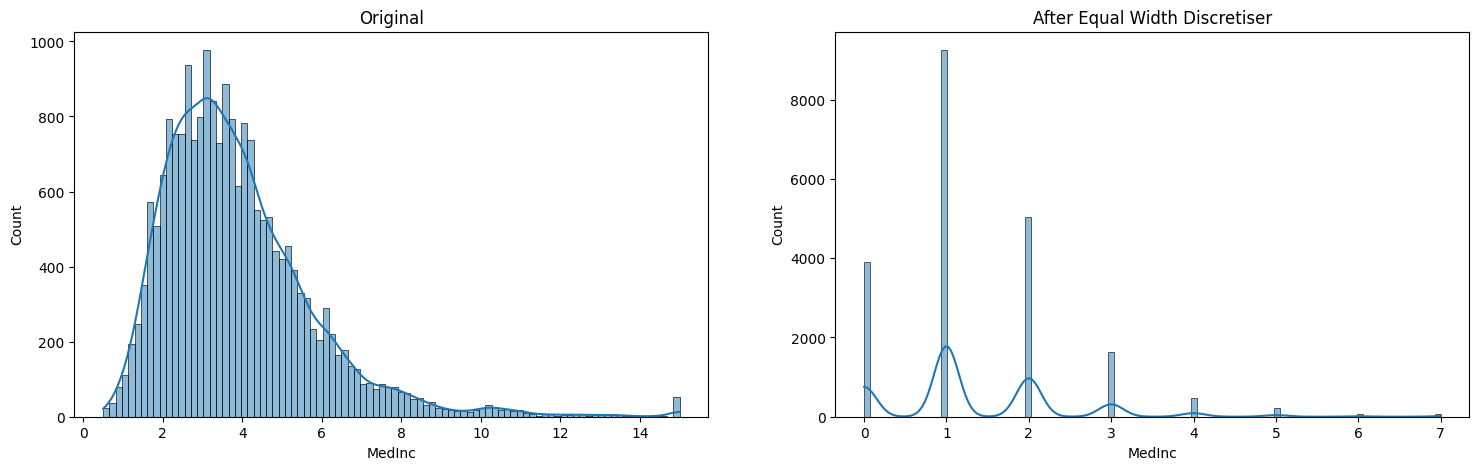

In [18]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=2,nrows=1)

sns.histplot(data=df, x="MedInc", ax=axs[0], kde=True);axs[0].set_title(f"Original")
sns.histplot(data=df_EqualWidthDiscretiser, x="MedInc", ax=axs[1], kde=True);axs[1].set_title(f"After Equal Width Discretiser")
fig.subplots_adjust(hspace=1)

**Task 3.3**: What do you observe from the distributions of the MedInc feature before and after discretisation?

This can be useful when creating probability mass functions. Formally, in density estimation.

**3.1.2.2 Equal-frequency discretization**

Equal-frequency discretization is another data preprocessing technique used in feature engineering to transform continuous numerical data into discrete categories of equal frequency. This method divides the range of the data into a specified number of bins or intervals, ensuring that each bin contains approximately the same number of data points.

**Task 3.4**: In this task, you will utilize the **KBinsDiscretizer** from scikit-learn (sklearn.preprocessing) to:
1. Fit and apply the KBinsDiscretizer to the 'MedInc' feature in the 'fetch_california_housing' dataset.
2. Plot and observe the histogram for the transformed feature.

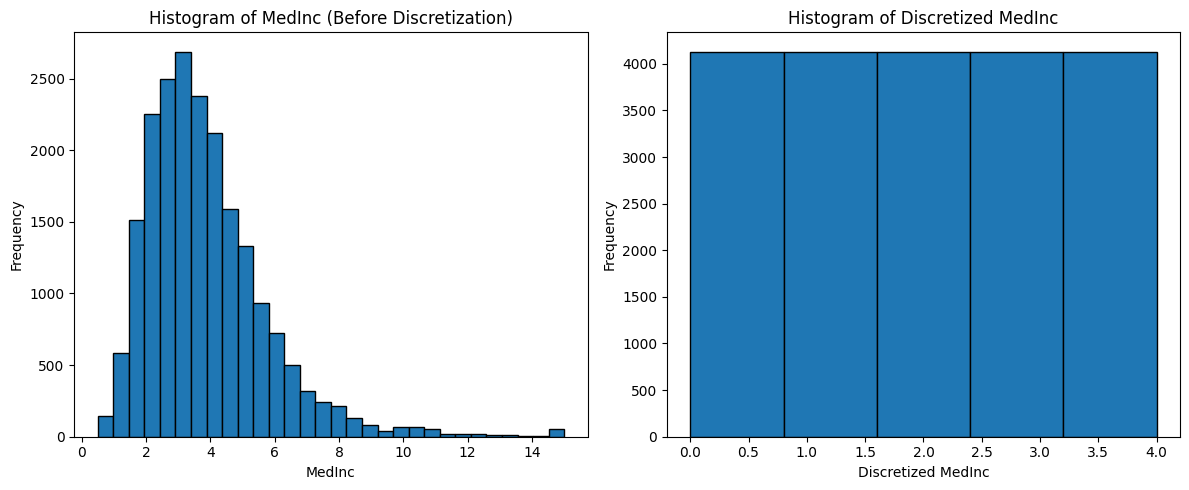

In [52]:
#write you code here
from sklearn.preprocessing import KBinsDiscretizer
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
df = pd.concat((X, y), axis=1)

med_inc = df['MedInc'].values.reshape(-1, 1)

n_bins = 5

discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
med_inc_discretized = discretizer.fit_transform(med_inc)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(med_inc, bins=30, edgecolor='black')
axs[0].set_title('Histogram of MedInc (Before Discretization)')
axs[0].set_xlabel('MedInc')
axs[0].set_ylabel('Frequency')

axs[1].hist(med_inc_discretized, bins=n_bins, edgecolor='black')
axs[1].set_title('Histogram of Discretized MedInc')
axs[1].set_xlabel('Discretized MedInc')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##3.1.3 Encoding


Encoding involves converting categorical data, such as text or labels, into a numerical format that machine learning models can interpret. In this experiment, you will investigate three encoding methods: one-hot encoding (creating binary columns for each category), label encoding (assigning a unique integer to each category), and ordinal encoding (mapping ordinal categories to numerical values).

**3.1.3.1 One-hot encoding**

To demonstrate one-hot encoding, You will apply these techniques to a modified version of the Medical Cost Personal Dataset from Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance). This dataset provides information pertaining to healthcare and medical insurance costs. It includes the following features:

1. Age: Represents the age of the insured individuals.
2. Gender: Indicates the gender of the insured individuals (male or female).
3. BMI (Body Mass Index): A numerical measure that assesses body weight in relation to height.
4. Children: Denotes the number of children or dependents covered by the insurance plan.
5. Smoker: Specifies whether the insured individuals are smokers (with values typically as "yes" or "no").
6. Region: Describes the geographic region or location where the insured individuals reside.
7. Charges: Represents the medical insurance charges or costs incurred by the insured individuals.

This dataset is stored in a file named **ENCS5141_Exp3_MedicalCostPersonalDatasets.csv**, which can be found in the GitHub repository located at https://github.com/mkjubran/ENCS5141Datasets.

To clone the repository if you haven't already done so, execute the following code

In [20]:
!rm -rf ./ENCS5141Datasets
!git clone https://github.com/mkjubran/ENCS5141Datasets.git

Cloning into 'ENCS5141Datasets'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 57 (delta 13), reused 48 (delta 7), pack-reused 0
Receiving objects: 100% (57/57), 3.66 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (13/13), done.


To read the file into a DataFrame and display information about the file run the following code snippet

In [38]:
import pandas as pd
df = pd.read_csv("/content/ENCS5141Datasets/ENCS5141_Exp3_MedicalCostPersonalDatasets.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Use the **OneHotEncoder** from sklearn to encode the **gender** feature.

In [39]:
# Import the necessary library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'gender' column of the DataFrame
enc.fit(df[['gender']])

# Transform the 'gender' column into a one-hot encoded array and convert it to a dense array
df_gender = enc.transform(df[['gender']]).toarray()

# Create a copy of the original DataFrame to store the one-hot encoded data
df_ohenc = df.copy()

# Add the one-hot encoded columns to the new DataFrame using the encoder's categories
df_ohenc[enc.categories_[0]] = df_gender

# Display the first few rows of the new DataFrame
df_ohenc


,age,gender,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0


Each category is represented by its own distinct binary column in the encoding. Remember to exclude the original 'gender' (text) feature from the encoded dataset before using it for machine learning purposes

**Task 3.5**: use the OneHotEncoder from sklearn from sklearn to encode the **smoker** and **region** features.

In [40]:
#write you code here
# Create an instance of the OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'gender' column of the DataFrame
enc.fit(df[['smoker']])

# Transform the 'gender' column into a one-hot encoded array and convert it to a dense array
df_smoker = enc.transform(df[['smoker']]).toarray()

# Create a copy of the original DataFrame to store the one-hot encoded data
df_ohenc = df_ohenc.copy()

# Add the one-hot encoded columns to the new DataFrame using the encoder's categories
df_ohenc[enc.categories_[0]] = df_smoker

enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'gender' column of the DataFrame
enc.fit(df[['region']])

# Transform the 'gender' column into a one-hot encoded array and convert it to a dense array
df_region = enc.transform(df[['region']]).toarray()

# Create a copy of the original DataFrame to store the one-hot encoded data
df_ohenc = df_ohenc.copy()

# Add the one-hot encoded columns to the new DataFrame using the encoder's categories
df_ohenc[enc.categories_[0]] = df_region

# Display the first few rows of the new DataFrame
df_ohenc

,age,gender,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**3.1.3.1 Label encoding**

**Task 3.6**: use the LabelEncoder from sklearn (sklearn.preprocessing) to encode all text features in the Medical Cost Personal Dataset and observe the difference between one-hot encoding and label encoding.

In [41]:
#write you code here
df = pd.read_csv("/content/ENCS5141Datasets/ENCS5141_Exp3_MedicalCostPersonalDatasets.csv")

label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])

df['smoker'] = label_encoder.fit_transform(df['smoker'])

df['region'] = label_encoder.fit_transform(df['region'])

df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#3.2 Handling High-Dimensional Data

To tackle this challenge, various techniques and strategies are employed. In this experiment, we will specifically investigate dimensionality reduction techniques as an approach to address high-dimensional data. Our focus will be on two prominent methods for dimensionality reduction: Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

**Principal Component Analysis (PCA)**: PCA is one of the most widely used techniques for reducing the dimensionality of data. It transforms the original features into a new set of orthogonal features called principal components. These components capture the maximum variance in the data, allowing for dimensionality reduction while retaining as much information as possible.

**Linear Discriminant Analysis (LDA)**: LDA is used when the goal is not just dimensionality reduction but also class separation. It finds a linear combination of features that maximizes the distance between different classes while minimizing the variance within each class.

Both PCA and LDA are dimensionality reduction techniques, PCA is unsupervised and aims to capture maximum variance, whereas LDA is supervised and focuses on maximizing class separation. The choice between PCA and LDA depends on the specific goals of your machine learning task and whether you are dealing with a classification problem.

##3.2.1 Principle component Analysis


**3.2.1.1 Synthetic Data**

To demonstrate the PCA, let us start with synthetic data as presented in the code snippet below.

In [42]:
import numpy as np
import pandas as pd

#To generate an array of floating numbers between -2 and 2
A = np.random.random(1000)*4 - 2

#To generate an array of floating numbers between -10 and 10
B = np.random.random(1000)*20 - 10

#To generate an array of floating numbers between 0 and 1
C = np.random.random(1000)

#To generate an array of floating numbers between 0 and 10
D = np.random.random(1000)*10

df = pd.DataFrame({'A':A,'B':B,'C':C,'D':D})
df.head()

,A,B,C,D
0,0.047488,-3.907807,0.386846,4.467683
1,-0.247948,-9.514942,0.857755,2.898755
2,1.185329,-8.603247,0.232705,4.845819
3,-1.833848,-7.296055,0.413689,0.629882
4,-1.169995,8.409608,0.019646,9.556107


Utilize scikit-learn's **PCA** (Principal Component Analysis) to derive PCA components from the synthetic data. In this context, we will configure the n_components parameter to yield a result of 4 components.

In [43]:
# Import the PCA module from scikit-learn
from sklearn.decomposition import PCA

# Create an instance of PCA with n_components set to 4
pca = PCA(n_components=4)

# Fit the PCA model on the data (assuming 'df' contains your dataset)
pca.fit(df)

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component are {pca.explained_variance_ratio_}")

# Transform the original DataFrame 'df' using PCA
Array_PCA = pca.transform(df)

# Create a new DataFrame 'df_PCA' from the transformed data
df_PCA = pd.DataFrame(Array_PCA)

# Display the first few rows of the new DataFrame
df_PCA.head()

Explained variance ratio for each PCA component are [0.78530889 0.182535   0.03026393 0.00189218]


,0,1,2,3
0,-3.318946,0.546166,0.028392,0.121813
1,-8.927888,2.098114,-0.323619,-0.344933
2,-8.030973,0.117405,1.077067,0.269583
3,-6.693622,4.417147,-1.809006,0.110350
4,9.041769,-4.454588,-1.110858,0.489449


Observing the explained variance ratio, which indicates how much of the total variance in the original dataset is accounted for by each principal component, we notice a decreasing trend. This suggests that the initial PCA components have higher variance compared to the later ones. Now, let's visualize the histograms before and after applying PCA

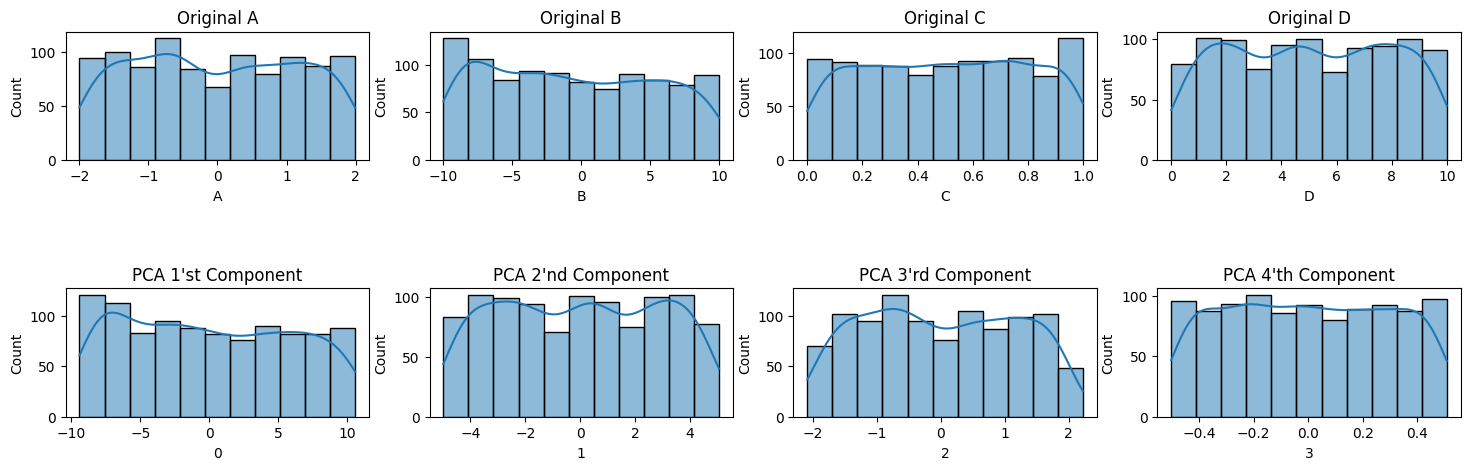

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=4,nrows=2)

sns.histplot(data=df, x="A", ax=axs[0,0], kde=True);axs[0,0].set_title(f"Original A")
sns.histplot(data=df, x="B", ax=axs[0,1], kde=True);axs[0,1].set_title(f"Original B")
sns.histplot(data=df, x="C", ax=axs[0,2], kde=True);axs[0,2].set_title(f"Original C")
sns.histplot(data=df, x="D", ax=axs[0,3], kde=True);axs[0,3].set_title(f"Original D")

sns.histplot(data=df_PCA, x=0, ax=axs[1,0], kde=True);axs[1,0].set_title(f"PCA 1'st Component")
sns.histplot(data=df_PCA, x=1, ax=axs[1,1], kde=True);axs[1,1].set_title(f"PCA 2'nd Component")
sns.histplot(data=df_PCA, x=2, ax=axs[1,2], kde=True);axs[1,2].set_title(f"PCA 3'rd Component")
sns.histplot(data=df_PCA, x=3, ax=axs[1,3], kde=True);axs[1,3].set_title(f"PCA 4'th Component")

fig.subplots_adjust(hspace=1)

Notice that the distribution of features in the original data differs from that of the PCA components. Additionally, observe the range of values in the PCA components, where the first component covers a wider range than the second, and this pattern continues for the other PCA components.


**Task 3.7**: Modify the numer of components to be preserved by PCA in the previous code and examine the outcomes.

In [45]:
# Import the PCA module from scikit-learn
from sklearn.decomposition import PCA

# Create an instance of PCA with n_components set to 4
pca = PCA(n_components=3)

# Fit the PCA model on the data (assuming 'df' contains your dataset)
pca.fit(df)

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component are {pca.explained_variance_ratio_}")

# Transform the original DataFrame 'df' using PCA
Array_PCA = pca.transform(df)

# Create a new DataFrame 'df_PCA' from the transformed data
df_PCA = pd.DataFrame(Array_PCA)

# Display the first few rows of the new DataFrame
df_PCA.head()

Explained variance ratio for each PCA component are [0.78530889 0.182535   0.03026393]


,0,1,2
0,-3.318946,0.546166,0.028392
1,-8.927888,2.098114,-0.323619
2,-8.030973,0.117405,1.077067
3,-6.693622,4.417147,-1.809006
4,9.041769,-4.454588,-1.110858


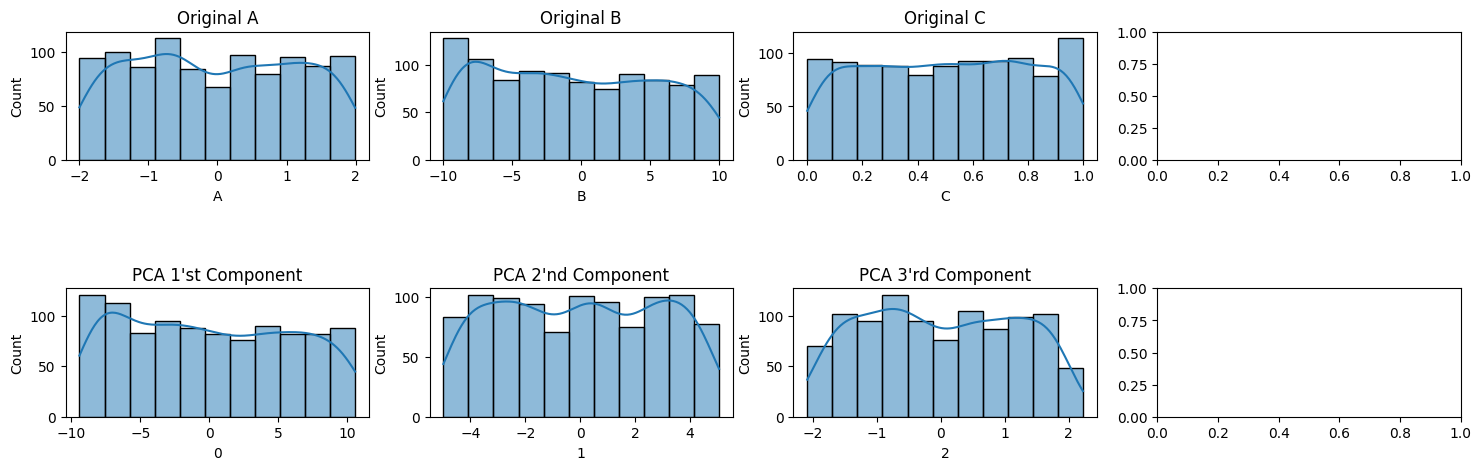

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=4,nrows=2)

sns.histplot(data=df, x="A", ax=axs[0,0], kde=True);axs[0,0].set_title(f"Original A")
sns.histplot(data=df, x="B", ax=axs[0,1], kde=True);axs[0,1].set_title(f"Original B")
sns.histplot(data=df, x="C", ax=axs[0,2], kde=True);axs[0,2].set_title(f"Original C")

sns.histplot(data=df_PCA, x=0, ax=axs[1,0], kde=True);axs[1,0].set_title(f"PCA 1'st Component")
sns.histplot(data=df_PCA, x=1, ax=axs[1,1], kde=True);axs[1,1].set_title(f"PCA 2'nd Component")
sns.histplot(data=df_PCA, x=2, ax=axs[1,2], kde=True);axs[1,2].set_title(f"PCA 3'rd Component")

fig.subplots_adjust(hspace=1)

**3.2.1.2 "Digits" Dataset**

To assess the influence of PCA on machine learning, we will evaluate and compare the performance of machine learning models with and without employing PCA for feature processing. We will load the "Digits" dataset from sklearn. This dataset is a commonly employed for practicing classification algorithms. Here are the key characteristics of the Digits dataset:
- **Data Source**: The dataset consists of 8x8 pixel images of handwritten digits (0 through 9). These images are grayscale and were originally collected from different individuals.
- **Data Format**: Each image is represented as an 8x8 matrix of pixel values. In scikit-learn, these matrices are flattened into 64-element feature vectors, where each element represents the intensity of a pixel (ranging from 0 to 16).
- **Target Labels**: For each image, there is a corresponding label (target) that indicates the digit it represents (0 through 9). These labels are commonly used for classification tasks, where the goal is to train a machine learning model to recognize handwritten digits.

In this context, we will employ the **train_test_split()** method to partition the dataset into training and testing datasets. Subsequently, we will utilize the training data to train the random forest classifier. Following the training, we will assess the testing accuracies (classification correctness) before and after PCA. More comprehensive details regarding the random forest classifier and the training and evaluation processes will be discussed in future experiments.

In [28]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create PCA instance and fit to the data
pca = PCA(n_components=8)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the retained PCA components and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_variance = accuracy_score(y_test, y_pred)

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component: {pca.explained_variance_ratio_}")

print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features retained after PCA: {X_train_pca.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Accuracy after PCA (testing accuracy): {accuracy_variance}")

Explained variance ratio for each PCA component: [0.14804542 0.13685747 0.12028728 0.08430325 0.05633687 0.04930788
 0.04276468 0.0356679 ]
Number of original features: 64
Number of features retained after PCA: 8
Accuracy of Original features (testing accuracy): 0.9722222222222222
Accuracy after PCA (testing accuracy): 0.9333333333333333


**Task 3.8**: Adjust the number of components to be retained by PCA in the code snippet for classifying images in the Digits dataset and observe how it affects the classification accuracy.

In [54]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create PCA instance and fit to the data
pca = PCA(n_components=10)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the retained PCA components and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_variance = accuracy_score(y_test, y_pred)

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component: {pca.explained_variance_ratio_}")

print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features retained after PCA: {X_train_pca.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Accuracy after PCA (testing accuracy): {accuracy_variance}")

Explained variance ratio for each PCA component: [0.14804542 0.13685747 0.12028728 0.08430325 0.05633692 0.04930783
 0.0427651  0.03567016 0.03371613 0.03034017]
Number of original features: 64
Number of features retained after PCA: 10
Accuracy of Original features (testing accuracy): 0.9722222222222222
Accuracy after PCA (testing accuracy): 0.9527777777777777


Increasing increases

**Task 3.9**: In this task, you will reinforce the knowledge acquired during the experiment concerning the impact of applying PCA on machine learning. You will be working with the "Faces in the Wild" (LFW) dataset. The LFW dataset is a widely recognized benchmark dataset within the domains of computer vision and machine learning, primarily used for face recognition tasks. It comprises a collection of grayscale images featuring human faces, with each image associated with the identity of the depicted individual.

Once you have loaded the dataset, your objective is to implement the following steps:
1. Split the dataset into training and testing subsets.
2. Train a random forest model using the training data.
3. Assess the model's accuracy by evaluating its performance on the testing data.
4. Apply PCA with a specified number of components, such as n=8.
5. Train and evaluate the random forest model using the retained PCA components.
6. Experiment with different numbers of retained PCA components and provide insights based on your observations.


You can load the LFW dataset using the provided code snippet.

In [67]:
from sklearn.datasets import fetch_lfw_people

lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract the data and target labels
X = lfw_dataset.data
y = lfw_dataset.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a random forest model using the training data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

accuracy_without_pca = accuracy_score(y_test, rf_classifier.predict(X_test))
print("Accuracy without PCA:", accuracy_without_pca)

n_components = 8
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)
accuracy_with_pca = accuracy_score(y_test, rf_classifier_pca.predict(X_test_pca))
print(f"Accuracy with PCA (n={n_components}):", accuracy_with_pca)

component_list = [2, 4, 8, 16, 32, 64]
for n_components in component_list:
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    rf_classifier_pca = RandomForestClassifier(random_state=42)
    rf_classifier_pca.fit(X_train_pca, y_train)
    accuracy = accuracy_score(y_test, rf_classifier_pca.predict(X_test_pca))
    print(f"Accuracy with PCA (n={n_components}):", accuracy)


Accuracy without PCA: 0.9722222222222222
Accuracy with PCA (n=8): 0.9444444444444444
Accuracy with PCA (n=2): 0.6222222222222222
Accuracy with PCA (n=4): 0.8388888888888889
Accuracy with PCA (n=8): 0.9444444444444444
Accuracy with PCA (n=16): 0.9694444444444444
Accuracy with PCA (n=32): 0.975
Accuracy with PCA (n=64): 0.9694444444444444
